In [1]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [5]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

#### Question 1 - Solution

price - numerical-discrete
pages - numerical-discrete
avg_reviews - numerical-continuous
n_reviews - numerical-discrete
language - categorical-nominal

#### Question 2

In [9]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

#### Question 2 - Solution

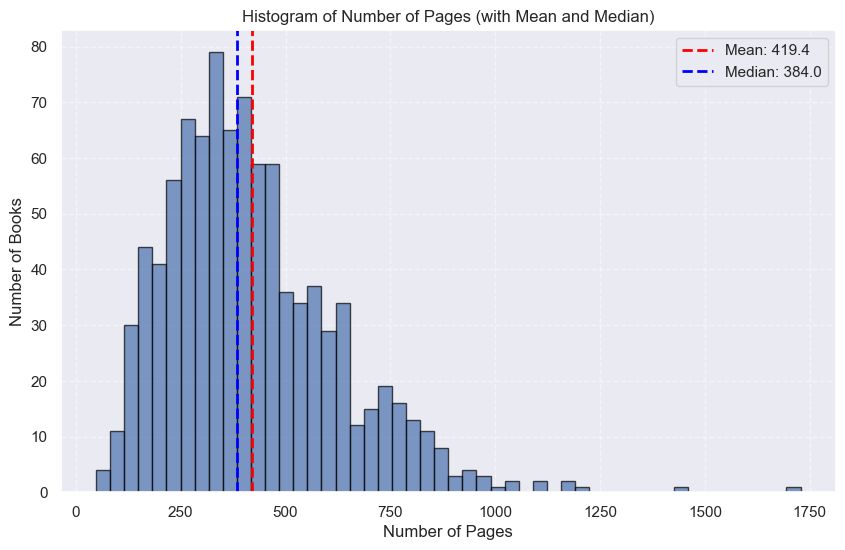

In [11]:
from scipy.stats import skew

pages = df['pages']
mean_pages = pages.mean()
median_pages = pages.median()
skewness = skew(pages)

plt.figure(figsize=(10, 6))

plt.hist(pages, bins=50, edgecolor='black', alpha=0.7)

plt.axvline(mean_pages, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_pages:.1f}')
plt.axvline(median_pages, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_pages:.1f}')

plt.xlabel('Number of Pages')
plt.ylabel('Number of Books')
plt.title('Histogram of Number of Pages (with Mean and Median)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The distribution is non-symmetric and skewed positive.

#### Question 3

In [14]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

#### Question 3 - Solution

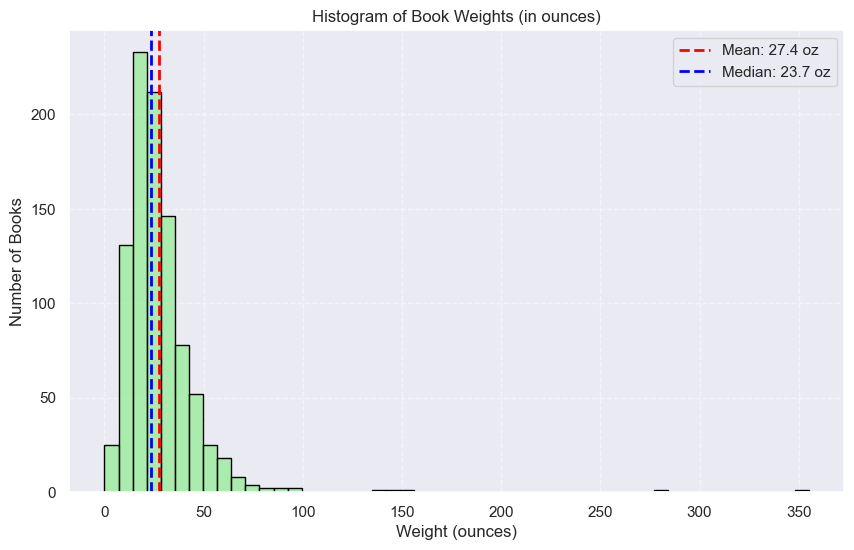

In [16]:


weights = df['weight'].dropna()

weights_in_ounces = []

for w in weights:
    w = str(w).lower()
    if 'pounds' in w:
        number = float(w.split(' ')[0])
        weights_in_ounces.append(number * 16)
    elif 'ounces' in w:
        number = float(w.split(' ')[0])
        weights_in_ounces.append(number)

weights_in_ounces = pd.Series(weights_in_ounces)

plt.figure(figsize=(10, 6))
sns.histplot(weights_in_ounces, bins=50, kde=False, edgecolor='black', color='lightgreen', alpha=0.7)

mean_w = weights_in_ounces.mean()
median_w = weights_in_ounces.median()
skew_w = skew(weights_in_ounces)

plt.axvline(mean_w, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_w:.1f} oz')
plt.axvline(median_w, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_w:.1f} oz')

plt.xlabel('Weight (ounces)')
plt.ylabel('Number of Books')
plt.title('Histogram of Book Weights (in ounces)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The distribution is non-symmetric and skewed positive.

#### Question 4

In [19]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 4 - Solution

In [21]:
dimensions = df['dimensions'].dropna()
prices = df['price'].dropna()

def compute_volume(dimension_str):
    try:
        parts = dimension_str.lower().replace('inches', '').split('x')
        parts = [float(p.strip()) for p in parts]
        if len(parts) == 3:
            return parts[0] * parts[1] * parts[2]  # length * width * height
        else:
            return np.nan
    except:
        return np.nan

volumes = dimensions.apply(compute_volume)

volume_price_df = pd.DataFrame({
    'volume': volumes,
    'price': df['price']
}).dropna()

correlation = volume_price_df['volume'].corr(volume_price_df['price'])

correlation

0.4318639463444666

#### Question 5

In [23]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 5 - Solution

<Axes: xlabel='volume', ylabel='price'>

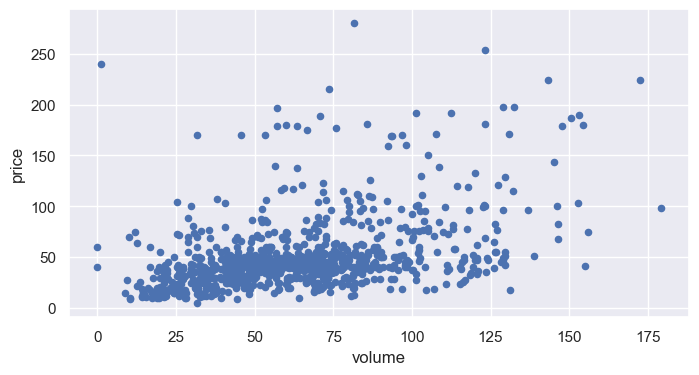

In [25]:
volume_price_df.plot(kind='scatter', x='volume', y='price')

#### Question 6

In [27]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

#### Question 6 - Solution

In [29]:
categories = [
    'data science',
    'data analytics',
    'data engineering',
    'machine learning',
    'statistics',
    'deep learning',
    'natural language processing'
]

category_counts = {}

titles = df['title'].dropna()

for category in categories:
    count = titles.str.lower().str.contains(category).sum()
    category_counts[category] = count

total_books_in_categories = sum(category_counts.values())
category_counts['total'] = total_books_in_categories

result_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Number of Books'])
result_df.index = result_df.index + 1
result_df

,Category,Number of Books
1,data science,111
2,data analytics,28
3,data engineering,7
4,machine learning,179
5,statistics,128
6,deep learning,138
7,natural language processing,13
8,total,604


#### Question 7

In [31]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

#### Question 7 - Solution

In [33]:
result_df_without_total = result_df[result_df['Category'] != 'total']

sorted_df = result_df_without_total.sort_values(by='Number of Books', ascending=False)

sorted_df.index = range(1, len(sorted_df) + 1)
sorted_df

,Category,Number of Books
1,machine learning,179
2,deep learning,138
3,statistics,128
4,data science,111
5,data analytics,28
6,natural language processing,13
7,data engineering,7


#### Question 8

In [35]:
### sample 10000 values from N~(50, 10)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (42.5, 57.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (42.5, 57.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 8 - Solution

In [37]:
import numpy as np
from statistics import NormalDist

random_values = np.random.normal(50, 10, 10000)

z = (42.5-50)/10
zscore = NormalDist().cdf(z)
portion_z = 1-zscore * 2

portion_empirical = np.mean((random_values >= 42.5) & (random_values <= 57.5))

results_df = pd.DataFrame({
    'Type': ['Z', 'Empirical'],
    'Portion': [portion_z, portion_empirical]
})

results_df

,Type,Portion
0,Z,0.546745
1,Empirical,0.542800


#### Question 9

In [39]:
### compute confidence interval of 90% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 9 - Solution

In [41]:
import pandas as pd
from statistics import NormalDist

def confidence_interval(data, alpha):
    mean, std, n = data.mean(), data.std(), len(data)
    z = NormalDist().inv_cdf(1 - alpha / 2.0)
    left = mean - z * std / (n ** 0.5)
    right = mean + z * std / (n ** 0.5)
    return left, right

df = pd.read_csv("amazon_books_data.csv")

price = df['price'].dropna()

left, right = confidence_interval(price, alpha=0.1)

results_df = pd.DataFrame({
    'left': left,
    'right': right
}, index=[0])
results_df

,left,right
0,50.144628,54.062428


#### Question 10

In [43]:
### can one say with 85% confidence that the true population mean of a book price resides within the [49.0, 54.0] interval?
### show your computations, and print your answer: yes or no

#### Question 10 - Solution

In [45]:
import pandas as pd
from statistics import NormalDist

def confidence_interval(data, alpha):
    mean, std, n = data.mean(), data.std(), len(data)
    z = NormalDist().inv_cdf(1 - alpha / 2.0)
    left = mean - z * std / (n ** 0.5)
    right = mean + z * std / (n ** 0.5)
    return left, right

df = pd.read_csv("amazon_books_data.csv")

price = df['price'].dropna()

left, right = confidence_interval(price, alpha=0.15)

results_df = pd.DataFrame({
    'left': left,
    'right': right
}, index=[0])
results_df

,left,right
0,50.389151,53.817904


Yes, [50.389151,53.817904] is in the range [49.0,54.0].